In [1]:
# Importing the Libraries necessary for the program
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# The Function generates a N point DCT Matrix which is based on type 2 DCT
# whose formula can be found as Equation 4 (pg 2) in the Paper.
# We use N = 8 when we are dealing with JPEG Compression, hence the same 
# value has been used here.

def generate_N_Point_DCT(N = 8, roundingFactor = 4):
    D = np.random.randn(N,N)
    for i in range(N):
        for j in range(N):
            if i==0:
                D[i,j] = np.round(1/np.sqrt(N),roundingFactor)
            else:
                D[i,j] = np.round(np.sqrt(2/N) * np.cos(((2*j + 1)*i*np.pi)/(2*N)),roundingFactor)
    return D

# This function calculates the DCT transform using the DCT Matrix using formula 5 (pg 3 in the paper).

def calculateDCT(a, dctMatrix):
    return np.round(dctMatrix @ a @ dctMatrix.T,2)

# The (8*8) Quantization Matrix which is predefined here is the standard
# matrix that is used in JPEG Compression.
# This function calculates the Quantization Matrix depending on the 
# percentage of compressed image size required.
# If the desired percentage is 90%, more information is retained and the 
# compression ratio turns out to be less.
# If the desired percentage is 10%, more compression takes place at the
# cost of loss of information.
# 50% is the Standard value that is chosen for JPEG compression, hence same 
# value has been used here.

def getQuantizationMatrix(requiredQualityLevel = 50):
    Q = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,103,99]])
    if requiredQualityLevel == 50:
        return Q
    elif requiredQualityLevel>50:
        Q = (Q * ((100-requiredQualityLevel)/50)).astype('int')
        Q = np.where(Q>255,255,Q)
        return Q
    else:
        Q = (Q * (50/requiredQualityLevel)).astype('int')
        Q = np.where(Q>255,255,Q)
        return Q

# This function gives us the quantized output which can be used to 
# find the relevant compressions in the image.

def quantizedOutputs(D,Q):
    C = D//Q
    return C

# This function takes one image channel as the input and returns the 
# DCT processed output for the same.
# We use DCT on the Image to convert it from Spectral Domain 
# (Y-Cb-Cr Channels) to its equivalent Frequency Domain.

def compressedInformation(Y, N = 8, compressionPercentage = 50, restrictingFactor = 5):
    h, w = Y.shape
    # N, restrictingFactor = 8, 5
    dctMatrix = generate_N_Point_DCT(N)
    Q = getQuantizationMatrix(compressionPercentage)
    outArr = np.random.randn(restrictingFactor,restrictingFactor,1)
    # print(outArr.shape)
    for i in range(0,h-N,N):
        for j in range(0,w-N,N):
            tempImg = Y[i:i+N, j:j+N]
            D = calculateDCT(tempImg, dctMatrix)
            C = quantizedOutputs(D,Q)
            C = C[:restrictingFactor,:restrictingFactor].reshape(restrictingFactor, restrictingFactor,1)
            outArr = np.concatenate((outArr, C), axis = 2)
            # print(D.shape)
    outArr = outArr[:,:,1:]
    # print(outArr.shape)
    return outArr

# This function calculates the compression ratio between the 
# input and processed output information.

def getCompressionRate(Y, processedY):
    a,b = Y.shape
    inputImagePixels = a*b*3
    a1, b1, c1 = processedY.shape
    outputImagePixels = a1*b1*c1*3
    return np.round(1-(outputImagePixels/inputImagePixels),2)

------------------------------------------------------------
Input Image Size (538, 897, 3)
------------------------------------------------------------


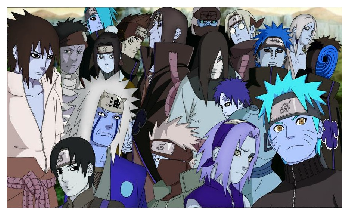

------------------------------------------------------------
Shape of the Resized Image is (480, 480, 3)
------------------------------------------------------------
Shape of Processed Y Matrix is (5, 5, 3481)
------------------------------------------------------------
Shape of Processed Cb Matrix is (5, 5, 3481)
------------------------------------------------------------
Shape of Processed Cr Matrix is (5, 5, 3481)
------------------------------------------------------------
Compression Rate Achieved is 0.62


In [3]:
BGRImage = cv2.imread('/content/naruto.jpg')
print("------------------------------------------------------------")
print("Input Image Size", BGRImage.shape)
print("------------------------------------------------------------")
plt.imshow(BGRImage, interpolation='nearest')
plt.axis('off')
plt.show()
BGRImage = cv2.resize(BGRImage, (480, 480)) 
print("------------------------------------------------------------")
print("Shape of the Resized Image is", BGRImage.shape)
YCrCbImage = cv2.cvtColor(BGRImage, cv2.COLOR_BGR2YCR_CB)
Y, Cb, Cr = YCrCbImage[:,:,0], YCrCbImage[:,:,1], YCrCbImage[:,:,2]
Y = np.array(Y).astype(np.int16)
Cb = np.array(Cb).astype(np.int16)
Cr = np.array(Cr).astype(np.int16)
Y, Cb, Cr = Y - 128, Cb - 128, Cr - 128

processedY = compressedInformation(Y)
print("------------------------------------------------------------")
print("Shape of Processed Y Matrix is", processedY.shape)
processedCb = compressedInformation(Cb)
print("------------------------------------------------------------")
print("Shape of Processed Cb Matrix is", processedCb.shape)
processedCr = compressedInformation(Cr)
print("------------------------------------------------------------")
print("Shape of Processed Cr Matrix is", processedCr.shape)

print("------------------------------------------------------------")
print("Compression Rate Achieved is", getCompressionRate(Y, processedY))

------------------------------------------------------------
Input Image Size (1600, 2560, 3)
------------------------------------------------------------


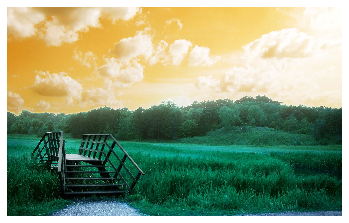

------------------------------------------------------------
Shape of the Resized Image is (1200, 800, 3)
------------------------------------------------------------
Shape of Processed Y Matrix is (5, 5, 14751)
------------------------------------------------------------
Shape of Processed Cb Matrix is (5, 5, 14751)
------------------------------------------------------------
Shape of Processed Cr Matrix is (5, 5, 14751)
------------------------------------------------------------
Compression Rate Achieved is 0.62


In [7]:
BGRImage = cv2.imread('/content/nature1.jpg')
print("------------------------------------------------------------")
print("Input Image Size", BGRImage.shape)
print("------------------------------------------------------------")
plt.imshow(BGRImage, interpolation='nearest')
plt.axis('off')
plt.show()
BGRImage = cv2.resize(BGRImage, (800, 1200)) 
print("------------------------------------------------------------")
print("Shape of the Resized Image is", BGRImage.shape)
YCrCbImage = cv2.cvtColor(BGRImage, cv2.COLOR_BGR2YCR_CB)
Y, Cb, Cr = YCrCbImage[:,:,0], YCrCbImage[:,:,1], YCrCbImage[:,:,2]
Y = np.array(Y).astype(np.int16)
Cb = np.array(Cb).astype(np.int16)
Cr = np.array(Cr).astype(np.int16)
Y, Cb, Cr = Y - 128, Cb - 128, Cr - 128

processedY = compressedInformation(Y)
print("------------------------------------------------------------")
print("Shape of Processed Y Matrix is", processedY.shape)
processedCb = compressedInformation(Cb)
print("------------------------------------------------------------")
print("Shape of Processed Cb Matrix is", processedCb.shape)
processedCr = compressedInformation(Cr)
print("------------------------------------------------------------")
print("Shape of Processed Cr Matrix is", processedCr.shape)

print("------------------------------------------------------------")
print("Compression Rate Achieved is", getCompressionRate(Y, processedY))

------------------------------------------------------------
Input Image Size (4111, 2848, 3)
------------------------------------------------------------


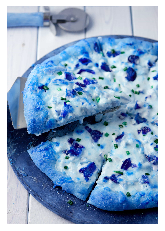

------------------------------------------------------------
Shape of the Resized Image is (1200, 1600, 3)
------------------------------------------------------------
Shape of Processed Y Matrix is (5, 5, 29651)
------------------------------------------------------------
Shape of Processed Cb Matrix is (5, 5, 29651)
------------------------------------------------------------
Shape of Processed Cr Matrix is (5, 5, 29651)
------------------------------------------------------------
Compression Rate Achieved is 0.61


In [5]:
BGRImage = cv2.imread('/content/pizza.jpg')
print("------------------------------------------------------------")
print("Input Image Size", BGRImage.shape)
print("------------------------------------------------------------")
plt.imshow(BGRImage, interpolation='nearest')
plt.axis('off')
plt.show()
BGRImage = cv2.resize(BGRImage, (1600, 1200)) 
print("------------------------------------------------------------")
print("Shape of the Resized Image is", BGRImage.shape)
YCrCbImage = cv2.cvtColor(BGRImage, cv2.COLOR_BGR2YCR_CB)
Y, Cb, Cr = YCrCbImage[:,:,0], YCrCbImage[:,:,1], YCrCbImage[:,:,2]
Y = np.array(Y).astype(np.int16)
Cb = np.array(Cb).astype(np.int16)
Cr = np.array(Cr).astype(np.int16)
Y, Cb, Cr = Y - 128, Cb - 128, Cr - 128

processedY = compressedInformation(Y)
print("------------------------------------------------------------")
print("Shape of Processed Y Matrix is", processedY.shape)
processedCb = compressedInformation(Cb)
print("------------------------------------------------------------")
print("Shape of Processed Cb Matrix is", processedCb.shape)
processedCr = compressedInformation(Cr)
print("------------------------------------------------------------")
print("Shape of Processed Cr Matrix is", processedCr.shape)

print("------------------------------------------------------------")
print("Compression Rate Achieved is", getCompressionRate(Y, processedY))

------------------------------------------------------------
Input Image Size (1200, 1920, 3)
------------------------------------------------------------


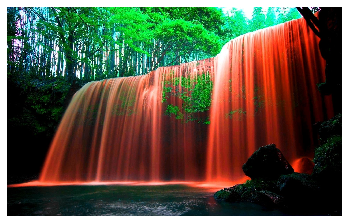

------------------------------------------------------------
Shape of the Resized Image is (128, 128, 3)
------------------------------------------------------------
Shape of Processed Y Matrix is (5, 5, 225)
------------------------------------------------------------
Shape of Processed Cb Matrix is (5, 5, 225)
------------------------------------------------------------
Shape of Processed Cr Matrix is (5, 5, 225)
------------------------------------------------------------
Compression Rate Achieved is 0.66


In [6]:
BGRImage = cv2.imread('/content/waterfall.jpg')
print("------------------------------------------------------------")
print("Input Image Size", BGRImage.shape)
print("------------------------------------------------------------")
plt.imshow(BGRImage, interpolation='nearest')
plt.axis('off')
plt.show()
BGRImage = cv2.resize(BGRImage, (128, 128)) 
print("------------------------------------------------------------")
print("Shape of the Resized Image is", BGRImage.shape)
YCrCbImage = cv2.cvtColor(BGRImage, cv2.COLOR_BGR2YCR_CB)
Y, Cb, Cr = YCrCbImage[:,:,0], YCrCbImage[:,:,1], YCrCbImage[:,:,2]
Y = np.array(Y).astype(np.int16)
Cb = np.array(Cb).astype(np.int16)
Cr = np.array(Cr).astype(np.int16)
Y, Cb, Cr = Y - 128, Cb - 128, Cr - 128

processedY = compressedInformation(Y)
print("------------------------------------------------------------")
print("Shape of Processed Y Matrix is", processedY.shape)
processedCb = compressedInformation(Cb)
print("------------------------------------------------------------")
print("Shape of Processed Cb Matrix is", processedCb.shape)
processedCr = compressedInformation(Cr)
print("------------------------------------------------------------")
print("Shape of Processed Cr Matrix is", processedCr.shape)

print("------------------------------------------------------------")
print("Compression Rate Achieved is", getCompressionRate(Y, processedY))